# Data Visualization Walkthrough

**Authors:** [Aviral Chawla](mailto:achawla1@uvm.edu)

**Date:** November 10, 2025

**Overview:** Fundamentals of data visualization walkthrough using matplotlib and seaborn. Also loading sample data to help visualize

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Basics of Matplotlib

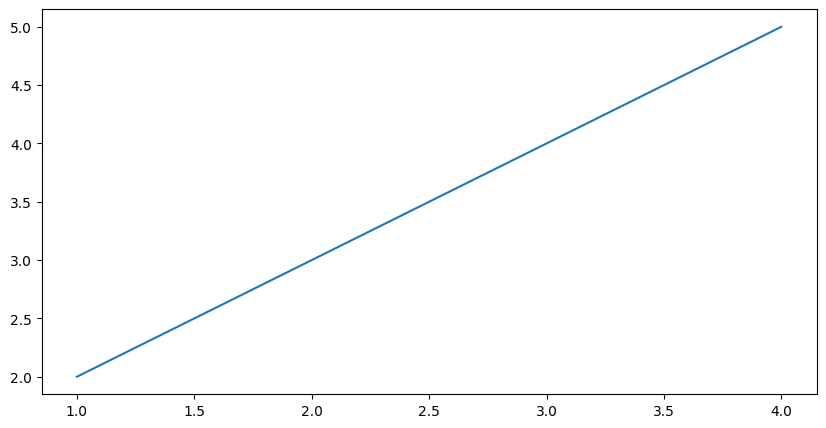

In [2]:
x = [1,2,3,4]
y = [2,3,4,5]
fig = plt.figure(figsize=(10,5))
plt.plot(x,y)
plt.show()

### Adding Subplots

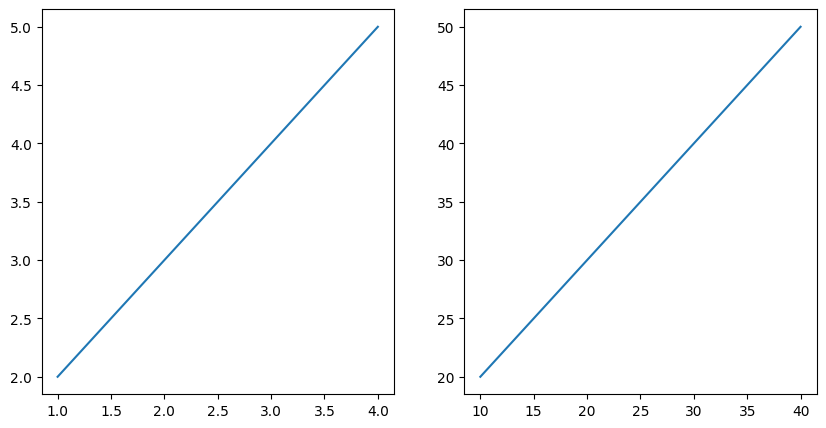

In [4]:
x1, y1 = [1,2,3,4], [2,3,4,5]
x2, y2 = [10,20,30,40], [20,30,40,50]

fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].plot(x1, y1)
axs[1].plot(x2, y2)
plt.show()

### Customizing Plots

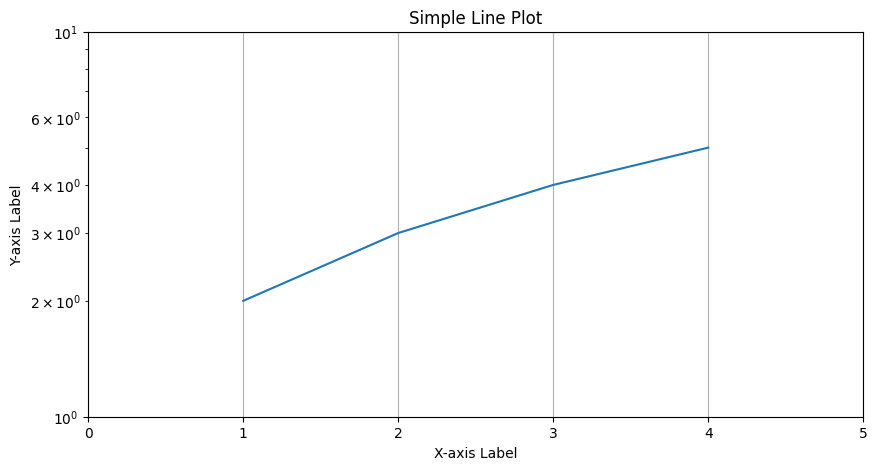

In [5]:
x = [1,2,3,4]
y = [2,3,4,5]
fig = plt.figure(figsize=(10,5))
plt.plot(x,y)
plt.title("Simple Line Plot") # <-- Added title
plt.xlabel("X-axis Label")   # <-- Added x-axis label
plt.ylabel("Y-axis Label")   # <-- Added y-axis label
plt.grid(True)              # <-- Added grid
# modifying scales
plt.yscale('log')          # <-- Set y-axis to logarithmic scale
plt.xlim(0,5)              # <-- Set x-axis limits
plt.ylim(1,10)             # <-- Set y-axis limits
plt.show()

## Visualizing Data
### Load data

In [6]:
df = pd.read_csv('../data/diabetes/diabetes_01.csv')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,...,1,0.0,5.0,10.0,20.0,0.0,0,11,4.0,5.0
1,1.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,11,4.0,3.0
2,1.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,10.0,0.0,0.0,0,9,4.0,7.0
3,1.0,0,1.0,1,29.0,0.0,1.0,1.0,1,1,...,1,0.0,5.0,0.0,30.0,1.0,1,12,3.0,4.0
4,0.0,0,0.0,1,24.0,1.0,0.0,0.0,0,0,...,1,0.0,3.0,0.0,0.0,1.0,1,13,5.0,6.0


In [9]:
print("Available columns in the dataset:")
print((df.columns.tolist()))

Available columns in the dataset:
['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


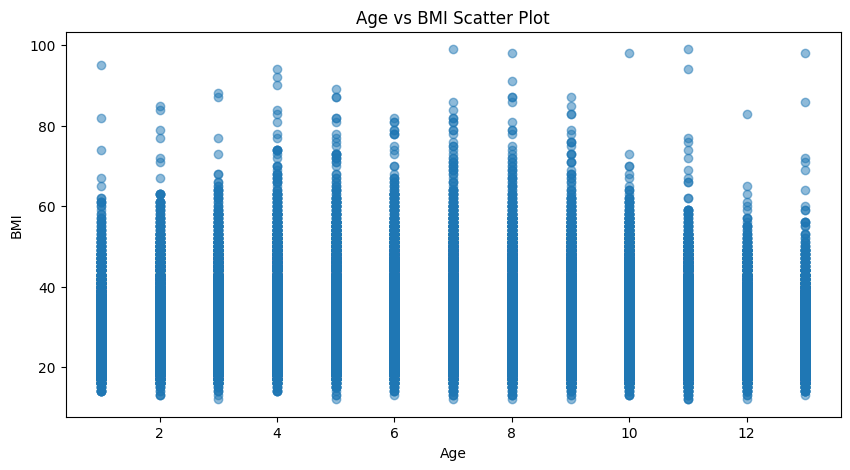

In [27]:
# Basic Scatter Plot
plt.figure(figsize=(10,5))
plt.scatter(df['Age'], df['BMI'], alpha=0.5)
plt.title("Age vs BMI Scatter Plot")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.show()

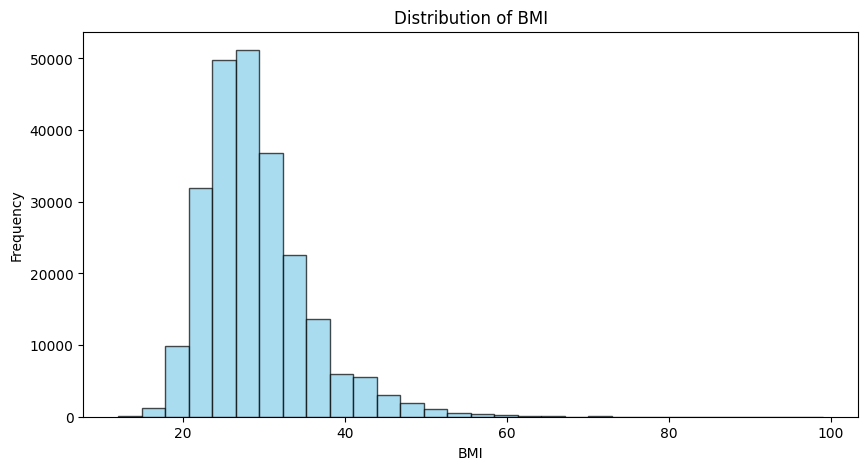

In [10]:
# Histogram
plt.figure(figsize=(10,5))
plt.hist(df['BMI'], bins=30, 
         color='skyblue', edgecolor='black', 
         alpha=0.7)
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

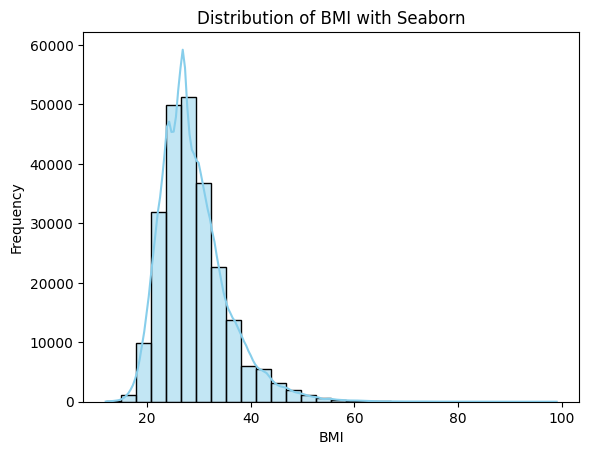

In [34]:
# Now with seaborn
sns.histplot(data=df, x='BMI', bins=30, kde=True, color='skyblue')
plt.title("Distribution of BMI with Seaborn")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

### What's Next?

'Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income'

Questions-
[Break down by `Diabetes_binary`]
1. Correlation between smoking and BMI (No difference in means and distribution)
2. Physical Activaty vs BMI
3. Heavy Alcohol Consumption and Mental Health
4. Age and Diabetes

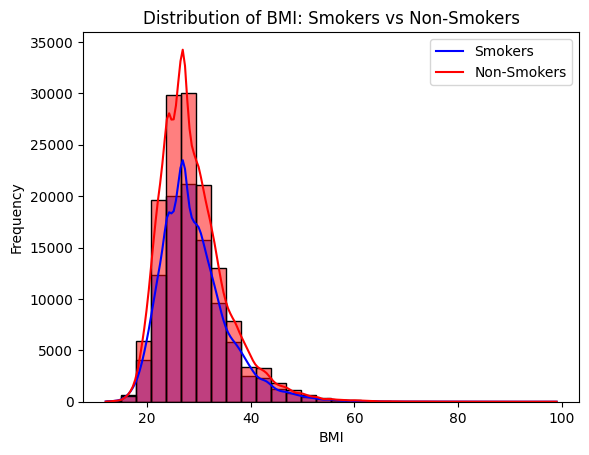

In [20]:
smoker_df = df[df['Smoker'] == 1]
nonsmoker_df = df[df['Smoker'] == 0]

sns.histplot(data=smoker_df, x='BMI', bins=30, kde=True, color='blue')
sns.histplot(data=nonsmoker_df, x='BMI', bins=30, kde=True, color='red')
plt.title("Distribution of BMI: Smokers vs Non-Smokers")
plt.legend(['Smokers', 'Non-Smokers'])
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

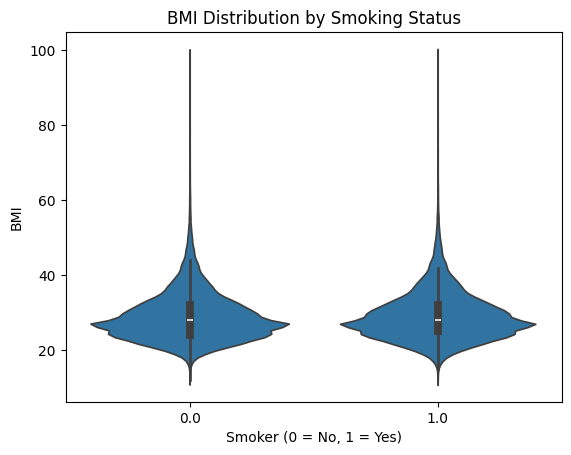

In [23]:
# Violin Plot
sns.violinplot(x='Smoker', y='BMI', data=df)
plt.title("BMI Distribution by Smoking Status")
plt.xlabel("Smoker (0 = No, 1 = Yes)")
plt.ylabel("BMI")
plt.show()

In [25]:
physicallyactive_df = df[df['PhysActivity'] == 1]
physicallyinactive_df = df[df['PhysActivity'] == 0]

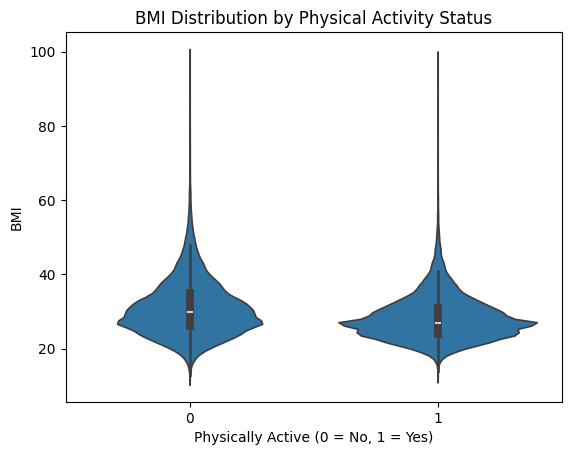

In [24]:
sns.violinplot(x='PhysActivity', y='BMI', data=df)
plt.title("BMI Distribution by Physical Activity Status")
plt.xlabel("Physically Active (0 = No, 1 = Yes)")
plt.ylabel("BMI")
plt.show()

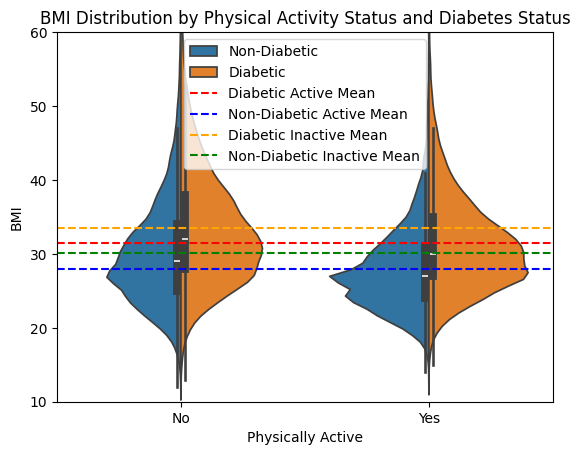

In [46]:
# Break down by diabetic or not
def map_diabetes(status):
    return 'Diabetic' if status == 1 else 'Non-Diabetic'
df['DiabetesStatus'] = df['Diabetes_binary'].apply(map_diabetes)
sns.violinplot(x='PhysActivity', y='BMI', data=df, hue='DiabetesStatus', split=True)
plt.title("BMI Distribution by Physical Activity Status and Diabetes Status")
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel("Physically Active")
plt.ylabel("BMI")
plt.legend(title='Status of Diabetes')
diabetic_active_mean = df[(df['PhysActivity'] == 1) & (df['Diabetes_binary'] == 1)]['BMI'].mean()
nondiabetic_active_mean = df[(df['PhysActivity'] == 1) & (df['Diabetes_binary'] == 0)]['BMI'].mean()
diabetic_inactive_mean = df[(df['PhysActivity'] == 0) & (df['Diabetes_binary'] == 1)]['BMI'].mean()
nondiabetic_inactive_mean = df[(df['PhysActivity'] == 0) & (df['Diabetes_binary'] == 0)]['BMI'].mean()

plt.axhline(diabetic_active_mean, color='red', linestyle='--', label='Diabetic Active Mean')
plt.axhline(nondiabetic_active_mean, color='blue', linestyle='--', label='Non-Diabetic Active Mean')
plt.axhline(diabetic_inactive_mean, color='orange', linestyle='--', label='Diabetic Inactive Mean')
plt.axhline(nondiabetic_inactive_mean, color='green', linestyle='--', label='Non-Diabetic Inactive Mean')
plt.ylim(10, 60)
plt.legend()
plt.show()

In [26]:
print("Average BMI for Physically Active:", physicallyactive_df['BMI'].mean())
print("Average BMI for Physically Inactive:", physicallyinactive_df['BMI'].mean())

Average BMI for Physically Active: 28.38170288773189
Average BMI for Physically Inactive: 30.972080099645492
